In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
retail_data = pd.read_csv("/content/sales_store_features.csv")
retail_data.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2,05/02/2010,50605.27,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2,2,1,3,05/02/2010,13740.12,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
3,3,1,4,05/02/2010,39954.04,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
4,4,1,5,05/02/2010,32229.38,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False


In [ ]:
# checking null values
retail_data.isnull().sum()

Unnamed: 0      0
Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
dtype: int64

<Axes: xlabel='Weekly_Sales', ylabel='Temperature'>

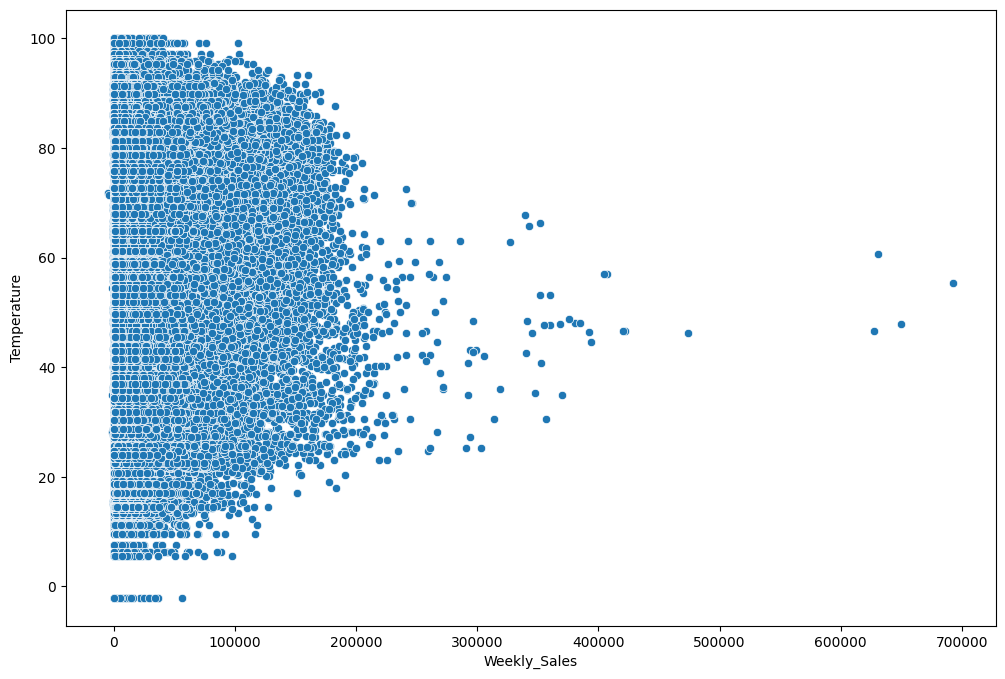

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='Temperature', data=retail_data)

<Axes: xlabel='Dept', ylabel='Weekly_Sales'>

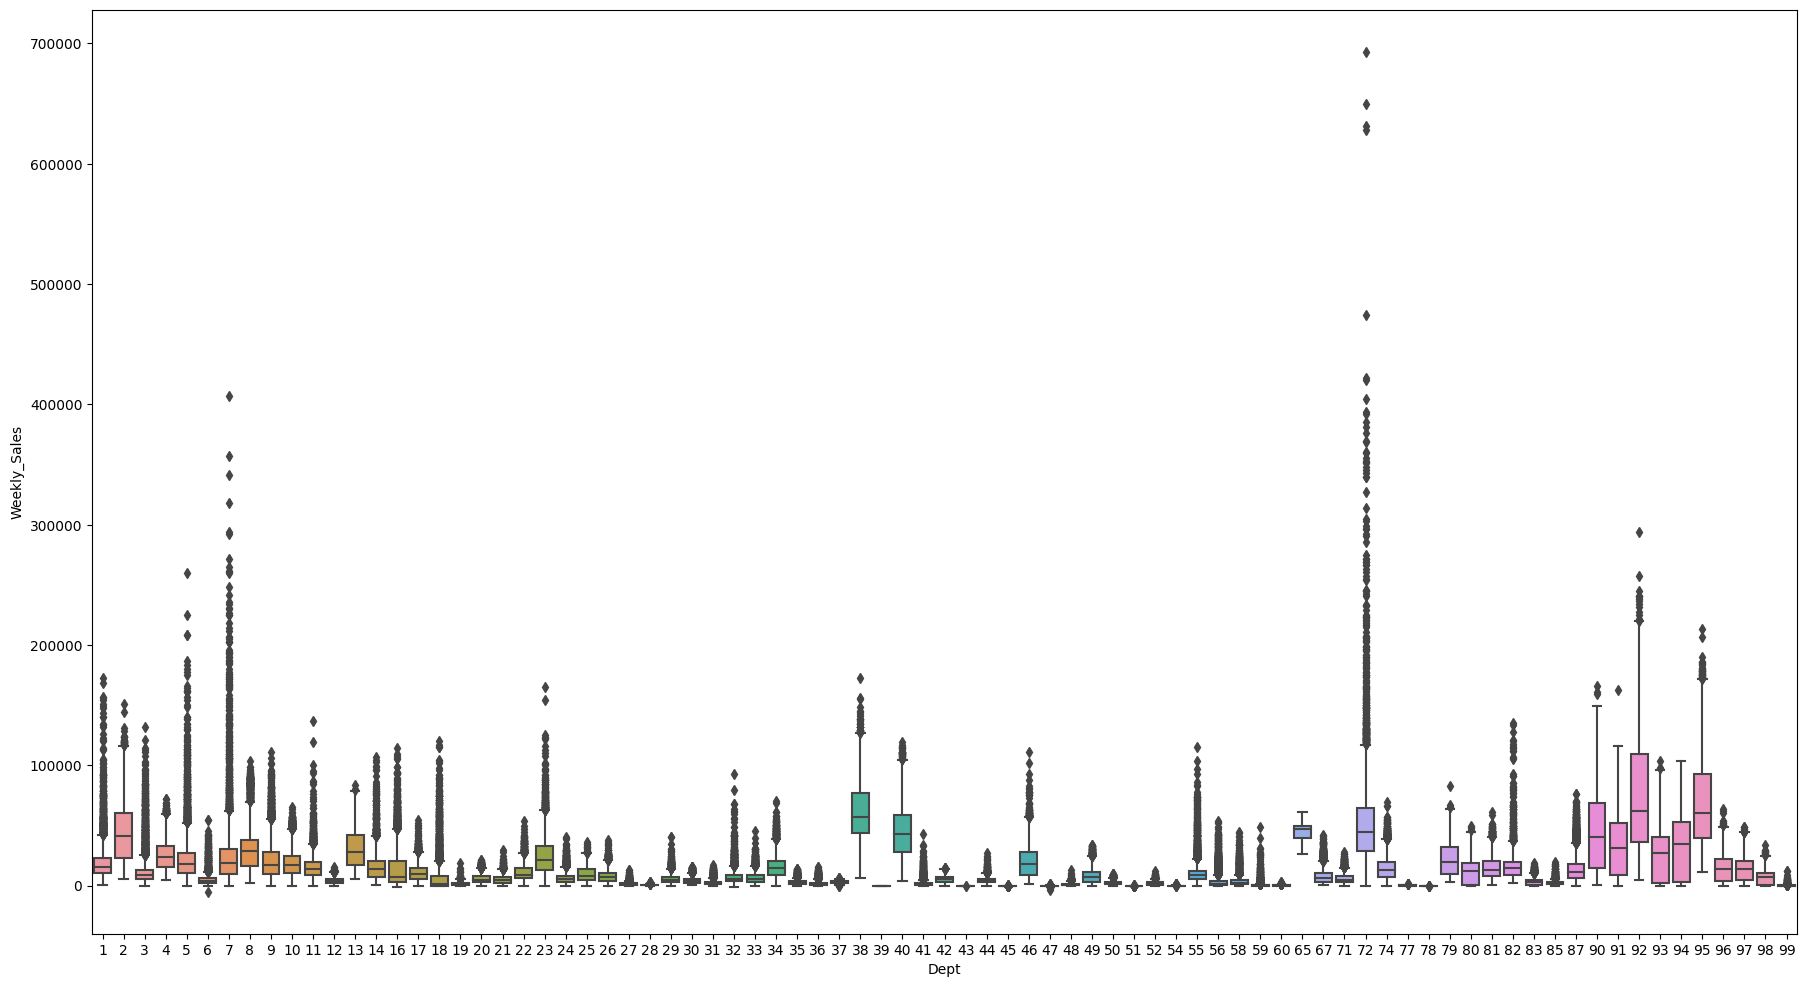

In [ ]:
# weekly sales for each department
plt.figure(figsize=(22,12))
sns.boxplot(x='Dept', y='Weekly_Sales', data=retail_data)

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

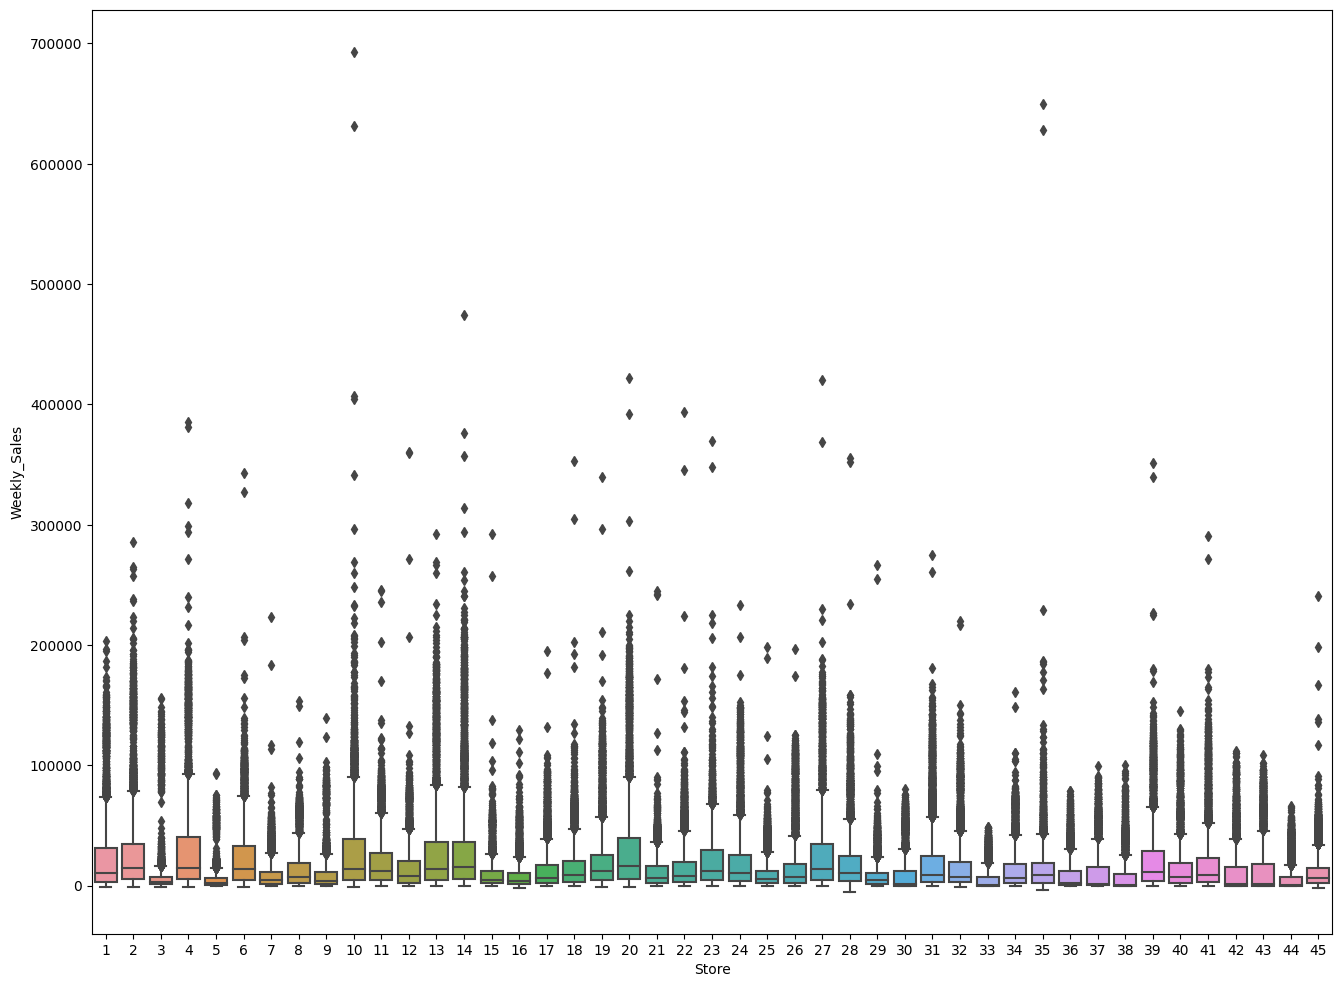

In [ ]:
# weekly_sales for each store
plt.figure(figsize=(16,12))
sns.boxplot(x='Store', y='Weekly_Sales', data=retail_data)

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

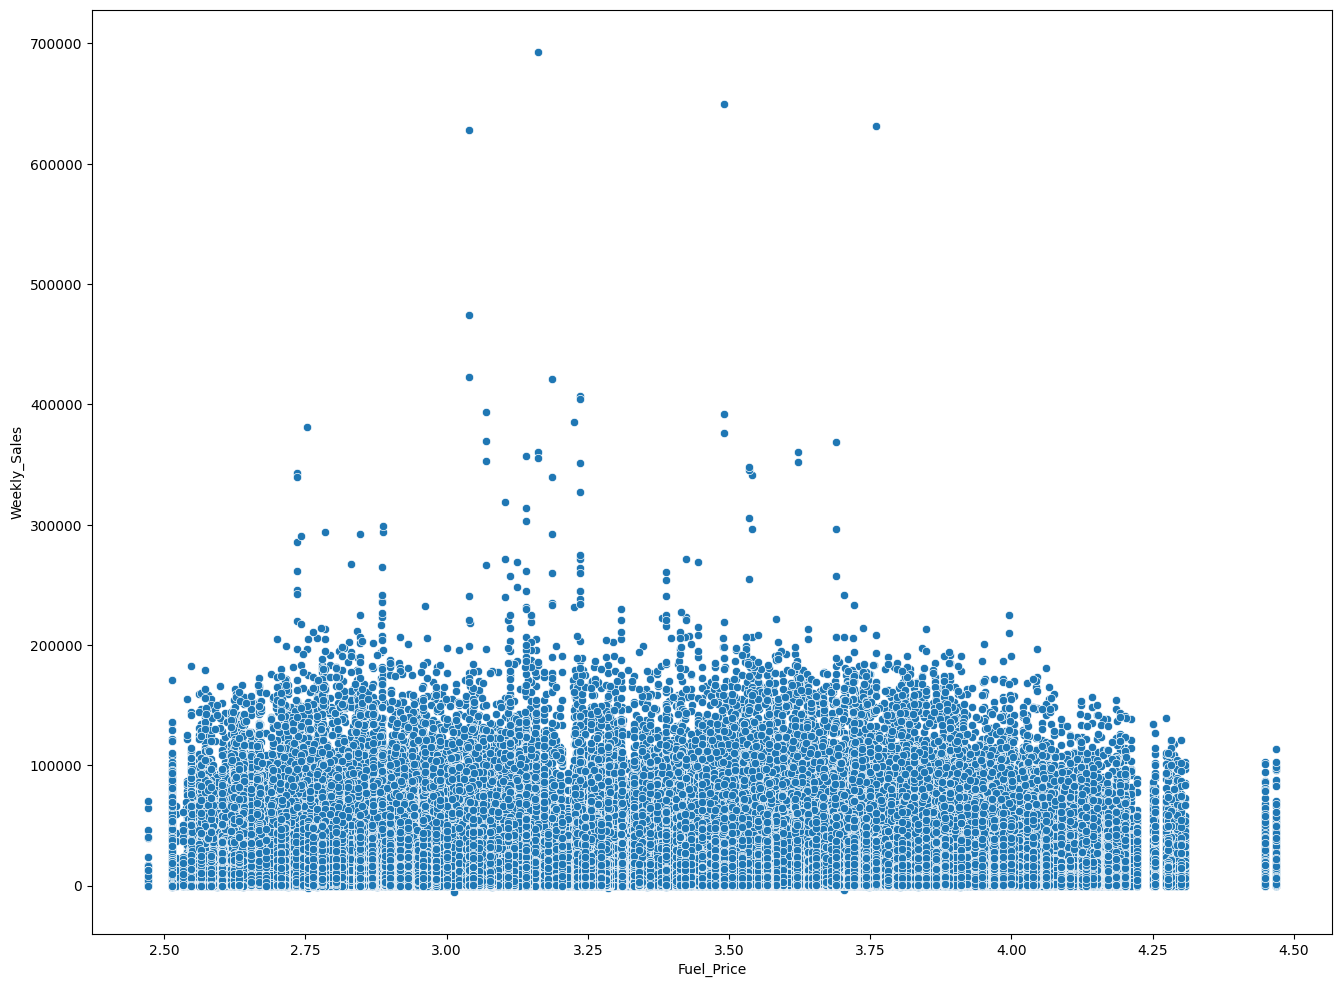

In [ ]:
#weekly sales based on fuel price
plt.figure(figsize=(16,12))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=retail_data)

<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

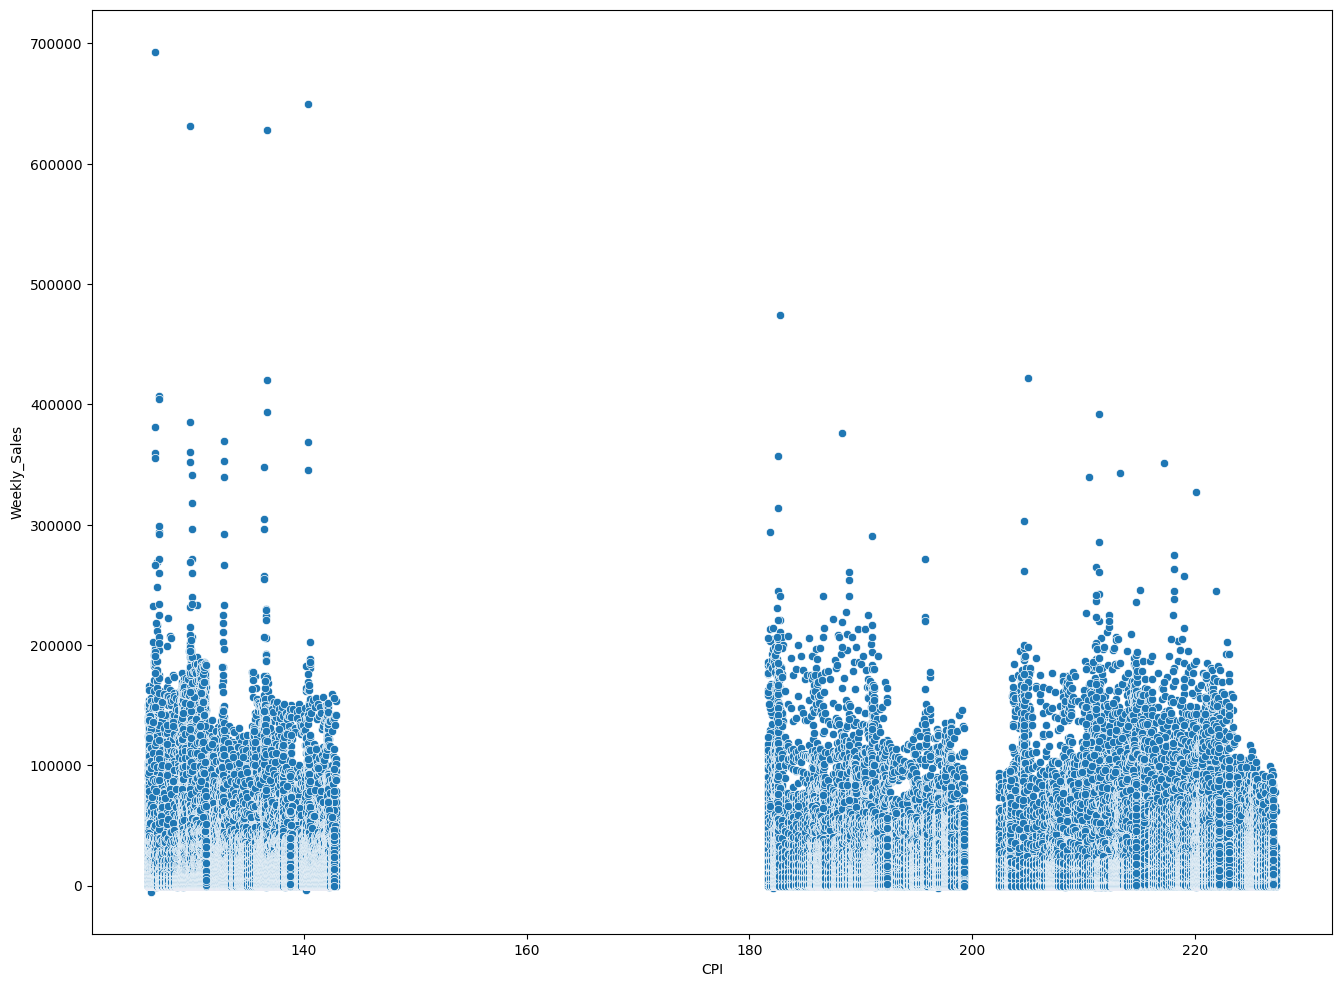

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=retail_data)

In [ ]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'], color = 'turquoise')
    plt.ylabel('Weekly Sales')
    plt.xlabel(column)

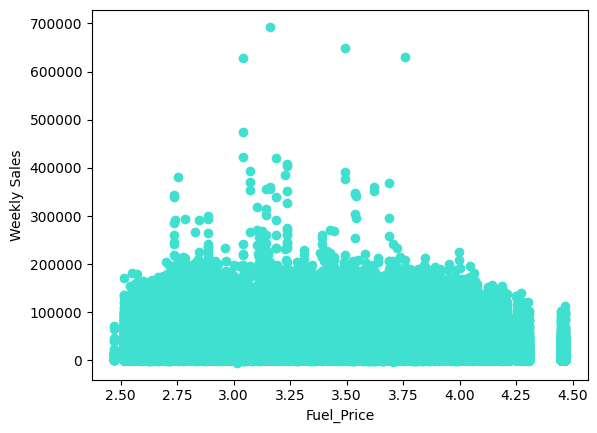

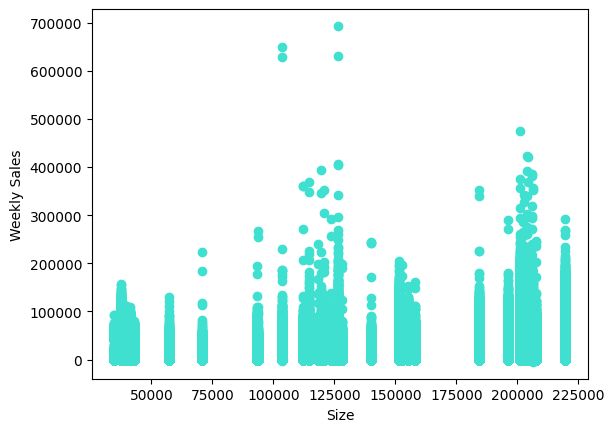

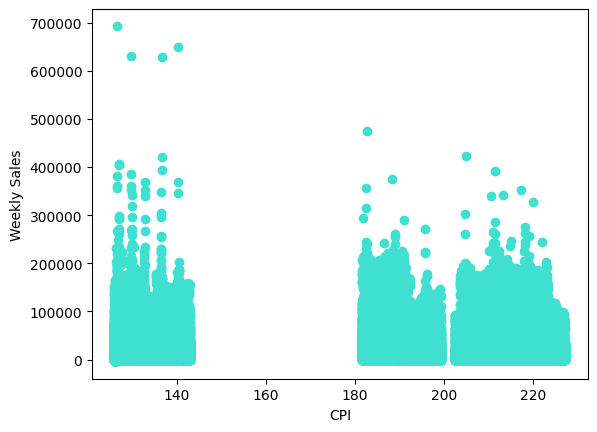

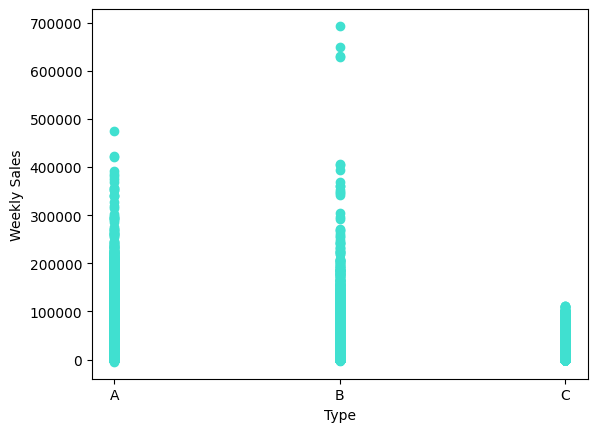

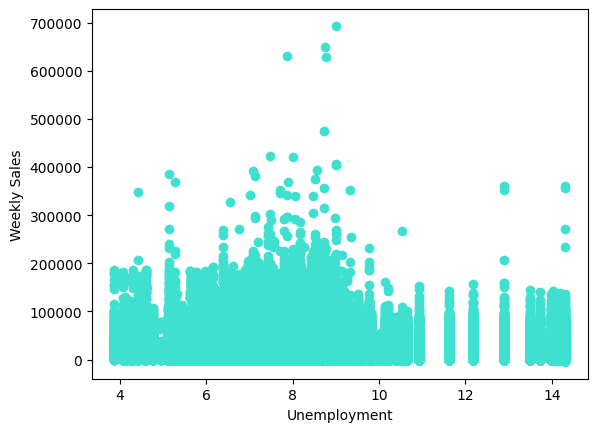

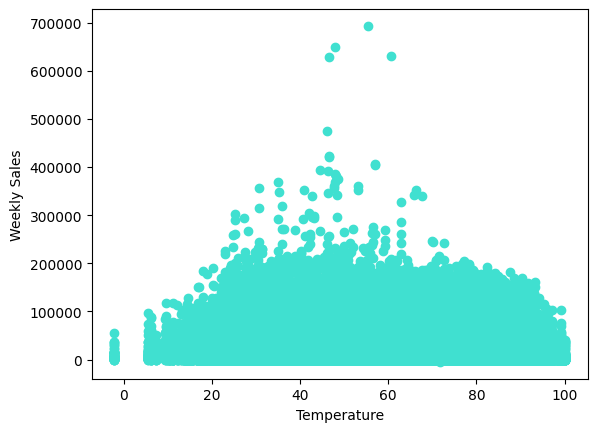

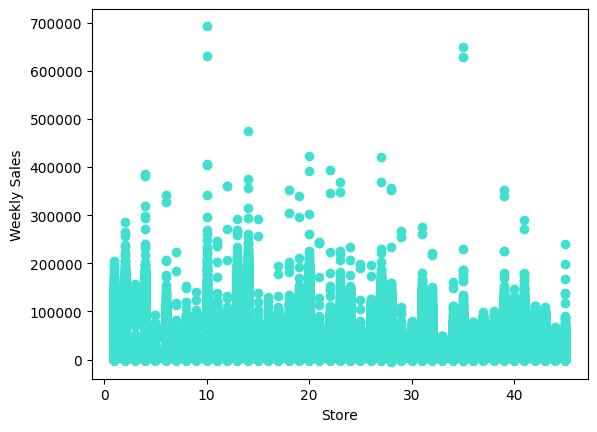

In [ ]:
scatter(retail_data, 'Fuel_Price')
scatter(retail_data, 'Size')
scatter(retail_data, 'CPI')
scatter(retail_data, 'Type')
scatter(retail_data, 'Unemployment')
scatter(retail_data, 'Temperature')
scatter(retail_data, 'Store')

In [ ]:
# Average weekly sales for each individual store
AvgWeeklySales_perStore = retail_data.groupby('Store')['Weekly_Sales'].mean()
AvgWeeklySales_perStore.head()

Store
1    21710.543621
2    26898.070031
3     6373.033983
4    29161.210415
5     5053.415813
Name: Weekly_Sales, dtype: float64

In [ ]:
# Top 3 stores with highest Avg weekly sales
AvgWeeklySales_perStore.nlargest(3)

Store
20    29508.301592
4     29161.210415
14    28784.851727
Name: Weekly_Sales, dtype: float64

In [ ]:
# stores with least Avg weekly sales
AvgWeeklySales_perStore.nsmallest(3)

Store
5     5053.415813
33    5728.414053
44    6038.929814
Name: Weekly_Sales, dtype: float64

In [ ]:
retail_data['Date'] = pd.to_datetime(retail_data.Date, dayfirst=True,infer_datetime_format=True)

In [ ]:
retail_data['Date']

0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
            ...    
421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, Length: 421570, dtype: datetime64[ns]

In [ ]:
retail_data['Month'] = retail_data['Date'].dt.month
retail_data['Month']

0          2
1          2
2          2
3          2
4          2
          ..
421565    10
421566    10
421567    10
421568    10
421569    10
Name: Month, Length: 421570, dtype: int64

<Axes: xlabel='Weekly_Sales', ylabel='Month'>

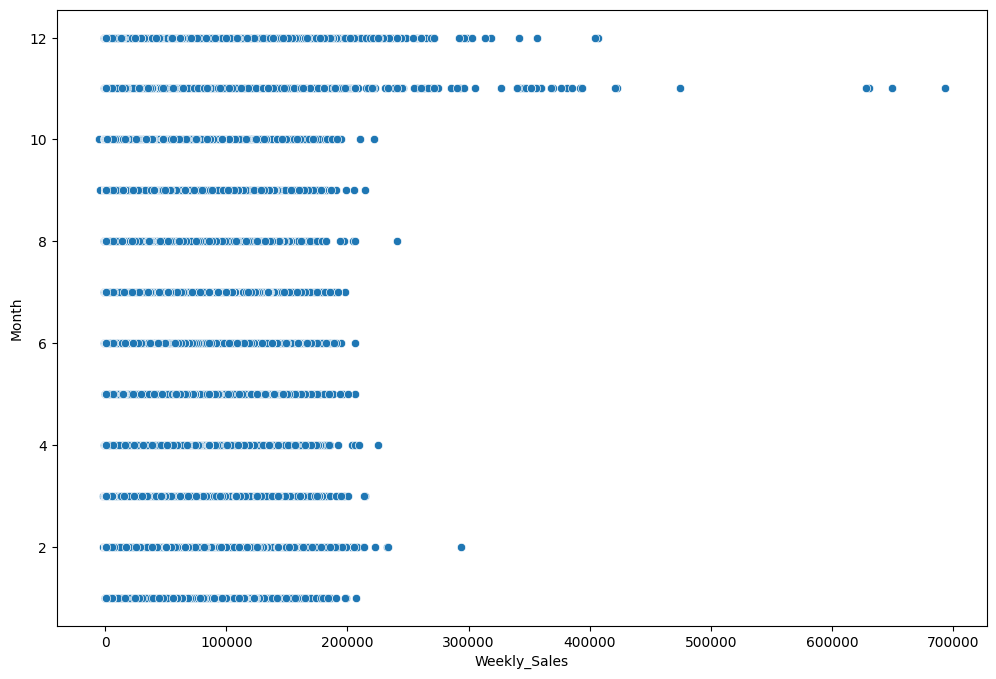

In [ ]:
# weekly_sales for every month.
plt.figure(figsize=(12,8))
sns.scatterplot(x='Weekly_Sales', y='Month', data=retail_data)

In [ ]:
AvgWeekly_sales_perDept = retail_data.groupby('Dept')['Weekly_Sales'].mean()

In [ ]:
AvgWeekly_sales_perDept

Dept
1     19213.485088
2     43607.020113
3     11793.698516
4     25974.630238
5     21365.583515
          ...     
95    69824.423080
96    15210.942761
97    14255.576919
98     6824.694889
99      415.487065
Name: Weekly_Sales, Length: 81, dtype: float64

In [ ]:
# top 3 departments with highest average weekly_sales
AvgWeekly_sales_perDept.nlargest(3)

Dept
92    75204.870531
95    69824.423080
38    61090.619568
Name: Weekly_Sales, dtype: float64

In [ ]:
# departments have the lowest average weekly_sales
AvgWeekly_sales_perDept.nsmallest(3)

Dept
47   -7.682554
43    1.193333
78    7.296638
Name: Weekly_Sales, dtype: float64

In [ ]:
# Top performing type of stores in term of sales
top_stores = retail_data.groupby(by=['Type'], as_index=False)['Weekly_Sales'].sum()
top_stores.sort_values('Weekly_Sales', ascending=False)

,Type,Weekly_Sales
0,A,4.331015e+09
1,B,2.000701e+09
2,C,4.055035e+08


In [ ]:
AvgWeeklySales_perStore.rename('AvgWeeklySalesperStore', inplace=True)

Store
1     21710.543621
2     26898.070031
3      6373.033983
4     29161.210415
5      5053.415813
6     21913.243624
7      8358.766148
8     13133.014768
9      8772.890379
10    26332.303819
11    19276.762751
12    14867.308619
13    27355.136891
14    28784.851727
15     9002.493073
16     7863.224124
17    12954.393636
18    15733.313136
19    20362.126734
20    29508.301592
21    11283.435496
22    15181.218886
23    19776.180881
24    18969.106500
25    10308.157810
26    14554.129672
27    24826.984536
28    18714.889803
29     8158.810609
30     8764.237719
31    19681.907464
32    16351.621855
33     5728.414053
34    13522.081671
35    13803.596986
36     8584.412563
37    10297.355026
38     7492.478460
39    21000.763562
40    13763.632803
41    17976.004648
42    11443.370118
43    13415.114118
44     6038.929814
45    11662.897315
Name: AvgWeeklySalesperStore, dtype: float64

In [ ]:
AvgWeekly_sales_perDept.rename('AvgWeeklySalesperDept',inplace=True)

Dept
1     19213.485088
2     43607.020113
3     11793.698516
4     25974.630238
5     21365.583515
          ...     
95    69824.423080
96    15210.942761
97    14255.576919
98     6824.694889
99      415.487065
Name: AvgWeeklySalesperDept, Length: 81, dtype: float64

In [ ]:
AverageMonthly_sales = retail_data.groupby('Month')['Weekly_Sales'].mean()
AverageMonthly_sales

Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: Weekly_Sales, dtype: float64

In [ ]:
AverageMonthly_sales.rename('AverageMonthlySales', inplace=True)

Month
1     14126.075111
2     16008.779217
3     15416.657597
4     15650.338357
5     15776.337202
6     16326.137002
7     15861.419650
8     16062.516933
9     15095.886154
10    15243.855576
11    17491.031424
12    19355.702141
Name: AverageMonthlySales, dtype: float64

In [ ]:
retail_data= retail_data.merge(AvgWeeklySales_perStore, how='left', left_on='Store',right_index=True)

In [ ]:
retail_data= retail_data.merge(AvgWeekly_sales_perDept, how='left', left_on='Dept',right_index=True)

In [ ]:
retail_data= retail_data.merge(AverageMonthly_sales, how='left', left_on='Month',right_index=True)

In [ ]:
retail_data.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Month,AvgWeeklySalesperStore,AvgWeeklySalesperDept,AverageMonthlySales
0,0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,19213.485088,16008.779217
1,1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,43607.020113,16008.779217
2,2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,11793.698516,16008.779217
3,3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,25974.630238,16008.779217
4,4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,...,0.0,0.0,0.0,211.096358,8.106,False,2,21710.543621,21365.583515,16008.779217


<ipython-input-35-f74deb9d31a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(retail_data.corr())


<Axes: >

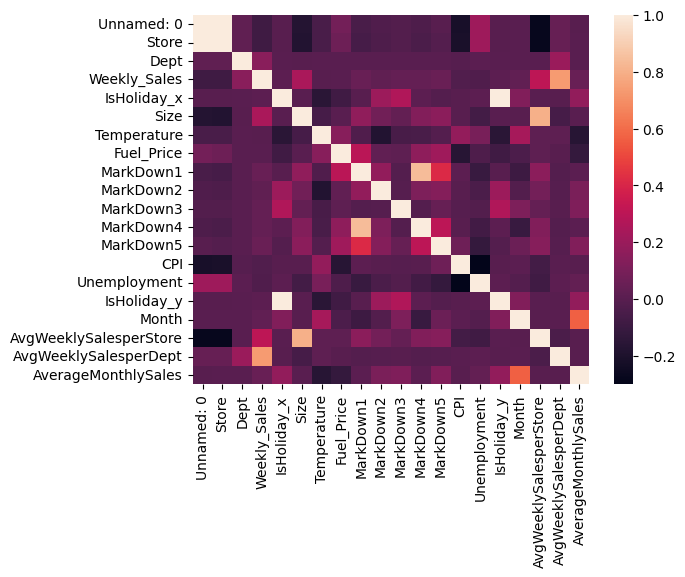

In [ ]:
sns.heatmap(retail_data.corr())

In [ ]:
retail_data.to_csv("Retail_EDA.csv")